<div style="text-align: center; font-weight: bold; font-size: 200%"> Negative ions ray neutralization for satellite propulsion</div>                                                        <br />      
<div style="text-align: center; font-size: 150%">Laboratoire de Physique des Plasmas - Ecole polytechnique</div><br />  


<table><tr>
<td> <img src="https://www.lpp.polytechnique.fr/IMG/logo_LPP.png" alt="Drawing" style="width: 30%;"/> </td>
</tr></table>

# DSMC

## Algorithm

For each time step $\Delta t$, 2 phases :
#### Advection phase : 
Particles are moved as if they did not interact. Particles that reach a boundary are processed accordingly.
#### Collision phase : 
For each cell, we compute a given number of collisions $M_{coll}$.
1. Choose two particles $i$ and $j$, in the cell, randomly.
2. Compute the collision probability which is proportional to their relative speed and depends on the **maximum relative speed** in the cell which for computational reasons should be estimated.
3. If the pair is accepted, the collision is processed with new velocities depending on the previous one and some randomness.
4. The routine moves again to step 1, until $M_{coll}$ is reached.

## Remarks :
- It is necessary to have enough particles (at least $20$ according to literature) per cell for the validity of the algorithm.
- One of the key point  is estimating the **maximum relative speed** in each cell.
- A simulated particle represents much more physical particles allowing a simulation to take place with roughly $10^4$ particles.

## Principles

- Choose $\Delta t$ so that it is a fraction of the **mean free time**.
- Choose $\Delta x = \Delta y$ (for square cells here) so that it is less that the **mean free path** $\lambda$.

### Calculating $\lambda$ - the mean free path 
By definition : 
$\lambda = \frac{1}{\sqrt{2}{} \pi d^2n}$

With : 
- $d$ : effective diameter of the particle. We choose : $d \approx 4 \times 10^{-10} \space m$ which is the diameter of $I_2$.
- $n$ : density of particules. We choose : $n = [I] \approx 10^{20} \space m^{-3}$.

That yields : $\lambda \approx 0.014 \space m$.

 **Note** : 
- $L \approx 0.005 \space m$.
- We can then compute the **Knudsen** number : $K_n = \frac{\lambda}{L} \approx 2$. It is considered that a continumm description is not accurate when $K_n > 0.1$.

The mean speed of $I$ is roughly $v=3 \times 10^2 \space m.s^{-1}$. Using the mean free path, that yields : $MeanFreeTime \approx 4.8 \times 10^{-5} \space s$ requiring $\Delta t \leq 1.2 \times 10^{-5} \space s$.

# Probability of collision

For a given cell containing $N_c$ particles, the number of pairs selected is :

$$M_{cand} = \frac{ \pi N_c \bar{N_c} d^2 v_{r,max} N_e}{2V_c} \Delta t$$ 

Where : 
* $\bar{N_c}$ is, for now, set at the start of the simulation and equals to : $\frac{\text{number of particles}}{\text{number of cells}}$ ;
* $d$ is the effective diameter (here : $4\times10^{-10}$ m) ;
* $v_{r,max}$ is the estimation of the maximum relative norm speed, here $600$ $m.s^{-1}$;
* $N_e$ is the number of real particles a simulated particle represents, here roughly $2 \times 10^{14}$ ;
* $V_c$ is the volume of the cell. 
* $\Delta t$ the time step.

The probability of collision for a given pair $(i,j)$ is then equals to : $\frac{v_{r, norm}}{v_{r,max}}$ where : $v_{r, norm} = \|v_j - v_i\|$.


# Simulation parameters
* $[I] = 10^{20}$ $m^{-3}$
* $ d = 4\times10^{-10}$ $m$
* $v_{mean} = 3\times 10^2$ $m.s^{-1}$ and $v_{r,max} = 2v_{mean}$

This allows to compute the **mean free time** and the **mean free path**.


* $dt = 0.25 \times MeanFreeTime = 1.17 \times 10^{-5}$ $s$.
* Mean number of particles per cell : $100$ or $200$.
* Number of cells : $N_{c,x} = 3$ ; $N_{c,y} = 3$ which makes $9$ cells. The size of the grid is then computed using the **mean free path** $\lambda$: $(\lambda N_{c,x},\lambda N_{c,y}, l_z)$ where $l_z = 0.1$ m. The total volume is thus : $0.042 \times 0.042 \times 0.1 = 1.7 \times 10^{-5}$ $m^{-3}$.


# Examples of systems after initialization
<table><tr>
<td> <img src="results_tests/gaussian_2/4_system_state_it_1.png" alt="Drawing" style="width: 800px;"/> </td>
<td> <img src="results_tests/uniform/2_system_state_it_1.png" alt="Drawing" style="width: 800px;"/> </td>
</tr></table>



## Three types of initialization for speed :
* Uniform  : each $v_x$, $v_y$ and $v_z$ is choosen uniform on $[-m,M]$, $m=M$. The law of  $V = \sqrt{{v_x}^2+{v_y}^2+{v_z}^2}$ can be obtained with geometric arguments (more below).
* Uniform on speed norm : $V = \sqrt{{v_x}^2+{v_y}^2+{v_z}^2}$ is choosen uniformy on $[m,M]$.
* Gaussian : each $v_x$, $v_y$ and $v_z$ is choosen along a gaussian distribution with $\sigma = \sqrt{\frac{k_bT}{m_i}}$ (where $m_i$ is the mass of the particle, here they are all the same) and $\mu = 0$. The distribution of  $V = \sqrt{{v_x}^2+{v_y}^2+{v_z}^2}$ is a maxwellian one.


# Explaination - law of  $V = \sqrt{{v_x}^2+{v_y}^2+{v_z}^2}$


For instance, 
* $\mathbb{P}(V < v) = 0$ for $v<0$.  
* $\mathbb{P}(V < v) = \frac{\text{Volume of the sphere of radius }v \text{ centered in }0}{m^3} = \frac{\frac{4}{3}\pi v^3}{m^3}$ for $0 \leq v \leq m$. 
* $\mathbb{P}(V < v) = ...  $ for $\sqrt{3}m > v > m$.
* $\mathbb{P}(V < v) = 1$ for $\sqrt{3}m < v$.

This yields : $\mathbb{E}(V)=$

# Results

# Uniform - Initialization
<table><tr>
<td> <img src="results_tests/uniform/2_vx_hist_distribution_it_1.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/uniform/2_vy_hist_distribution_it_1.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/uniform/2_vz_hist_distribution_it_1.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/uniform/2_speed_norm_hist_distribution_it_1.png" alt="Drawing" style="width: 250px;"/> </td>  
</tr></table>


# Uniform - final
<table><tr>
<td> <img src="results_tests/uniform/2_vx_hist_distribution_it_32.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/uniform/2_vy_hist_distribution_it_32.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/uniform/2_vz_hist_distribution_it_32.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/uniform/2_speed_norm_hist_distribution_it_32.png" alt="Drawing" style="width: 250px;"/> </td>  
</tr></table>

# Uniform - norm - Initialization
<table><tr>
<td> <img src="results_tests/uniform_norm/3_vx_hist_distribution_it_1.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/uniform_norm/3_vy_hist_distribution_it_1.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/uniform_norm/3_vz_hist_distribution_it_1.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/uniform_norm/3_speed_norm_hist_distribution_it_1.png" alt="Drawing" style="width: 250px;"/> </td>  
</tr></table>


# Uniform - norm - final

<table><tr>
<td> <img src="results_tests/uniform_norm/3_vx_hist_distribution_it_32.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/uniform_norm/3_vy_hist_distribution_it_32.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/uniform_norm/3_vz_hist_distribution_it_32.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/uniform_norm/3_speed_norm_hist_distribution_it_32.png" alt="Drawing" style="width: 250px;"/> </td>  
</tr></table>

Once the norm $V$ has been choosen, we randomly select $\phi$ and $\theta$ in $[0,2\pi[$ and then :
* $v_x = V sin(\theta) cos(\phi) $
* $v_x = V sin(\theta) sin(\phi) $
* $v_x = V cos(\theta) $

In [5]:
print("3+1 = {}".format(3+1))

3+1 = 4


# Gaussian initialization for each $v_x$, $v_y$ and $v_z$.

<table><tr>
<td> <img src="results_tests/gaussian_3/1_vx_hist_distribution_it_1.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/gaussian_3/1_vy_hist_distribution_it_1.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/gaussian_3/1_vz_hist_distribution_it_1.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/gaussian_3/1_speed_norm_hist_distribution_it_1.png" alt="Drawing" style="width: 250px;"/> </td>  
</tr></table>


# Gaussian final
<table><tr>
<td> <img src="results_tests/gaussian_3/1_vx_hist_distribution_it_32.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/gaussian_3/1_vy_hist_distribution_it_32.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/gaussian_3/1_vz_hist_distribution_it_32.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="results_tests/gaussian_3/1_speed_norm_hist_distribution_it_32.png" alt="Drawing" style="width: 250px;"/> </td>  
</tr></table>

# Collision frequency

* Number of collisions during simulation : $20089$ collisions ; 
* $N_e \approx 9.9 \times 10^{11}$ particles ;
Which yields : $2.0 \times 10^{17}$ 'real' collisions during the simulation.

Then, the number of collisions per unit of time, per unit of volume in theory is given by : $z = \frac{n}{2} \frac{\bar{v}}{\lambda}$.

We have : 
* $n = 10^{20}$ $m^{-3}$ ;
* $\bar{v} = 276.64$ $m.s^{-1}$ at the beginning of the simulation. It remains the same as the system is conservative ;
* $\lambda = 1.4 \times 10^{-2}$ $m$ ;

Which yields for a volume of $1.8 \times 10^{-4}$ $m^3$ and a elapsed time of $3.51 \times 10^{-3}$ $s$ to $6.2 \times 10^{17}$ collisions.


##  Modelization of temperature evolution for non maxwellian initializations

We are looking to modelize the standard deviation of the temperature distribution with the relation :
$$\sigma^2(t) = (\sigma^2(0) - \sigma^2_{eq})e^{-t/\tau}+\sigma^2_{eq}$$

Evolution fo temperature in the simulation, for each time step $n$: 
1. We define $w_n = v_n - <v_n>$
2. Which yields : $\sigma^2_n = <w_n^2>$ which is an approximaton of the variance of the random variable $V_n$ by definition.

Since the system is a conservative one, we can compute $<v_{0}^2>$, an approximation of the 2nd order moment of the random variable $V_0$ by definition. Then, if we suppose the thermal equilibrium, we can compute the scale parameter in the Maxwell distribution : $a = \sqrt{\frac{kT}{m}} =  \sqrt{\frac{<v_{0}^2>}{3}}$ for dimension thre. Which yields the variance :  $\sigma_{eq} = \frac{a^2(3\pi-8)}{\pi}$.

Then we minimize $|\sigma^2_n -\big[(\sigma^2(0) - \sigma^2_{eq})e^{-t/\tau}+\sigma^2_{eq}\big]|$ w.r.t. to $\tau$.

## Flux injection

### Normal distribution :


- For the case of ions / electrons that have been accelerated using electric fields in the direction $x_1$, then $x_2$ and $x_3$ should be treated as 'normal' maxwellian distribution and $x_1$ should be 

In [19]:
from random import random
import numpy as np

n=100000
list_vx = []
list_vy = []
list_vz = []

for k in range(n):
    R2=10
    while(R2>1):
        nu1 = random()
        nu2 = random()
        while(nu1 == 0):
            nu1=random()
        while(nu2 == 0):
            nu2 = random()
        R2 = nu1*nu1+nu2*nu2

    v1 = nu1*np.sqrt(-np.log(R2)/R2)
    v2 = nu2*np.sqrt(-np.log(R2)/R2)
    r1,r2 = np.sign(-0.5+random()),np.sign(-0.5+random())
    list_vx.append(r1*v1)
    list_vy.append(r2*v2)
    list_vz.append(np.sqrt(v2*v2+v1*v1))

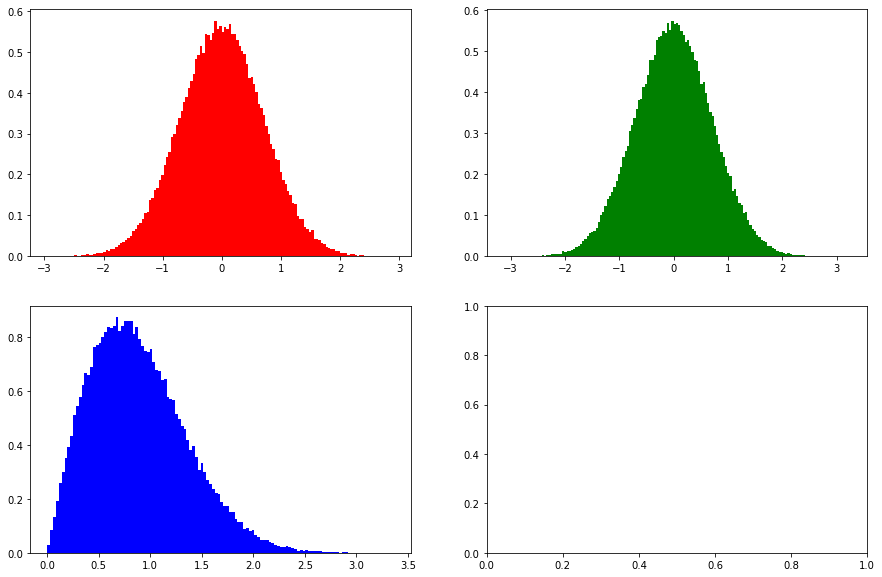

In [20]:
import matplotlib.pyplot as plt
    
fig, axes = plt.subplots(2,2, figsize = (15,10))

axes[0,0].hist(list_vx, bins = 'auto', density=True, range = None, color = 'r')
axes[0,1].hist(list_vy, bins = 'auto', density=True, range = None, color = 'g')
axes[1,0].hist(list_vz, bins = 'auto', density=True, range = None, color = 'b')

plt.show()

In [26]:
from scipy.stats import maxwell, norm
from random import gauss, random

n=1000000
list_vx = []
list_vy = []
list_vz = []
drift = 300 # m/s
sigma = 200 # m/s
list_norm = []
for k in range(n):
    vx = norm.rvs(drift, sigma)
    vy = norm.rvs(0, sigma)
    vz = norm.rvs(0, sigma)
    list_vx.append(vx)
    list_vy.append(vy)
    list_vz.append(vz)
    list_norm.append(np.sqrt(vx*vx+vy*vy+vz*vz))

In [32]:
def get_maxwellian_params(μ=0, σ=1):
    a = σ * np.sqrt(np.pi/(3.0*np.pi - 8.0)) # https://mathworld.wolfram.com/MaxwellDistribution.html
    m = 2.0*a*np.sqrt(2.0/np.pi)
    loc = μ - m
    return loc, a

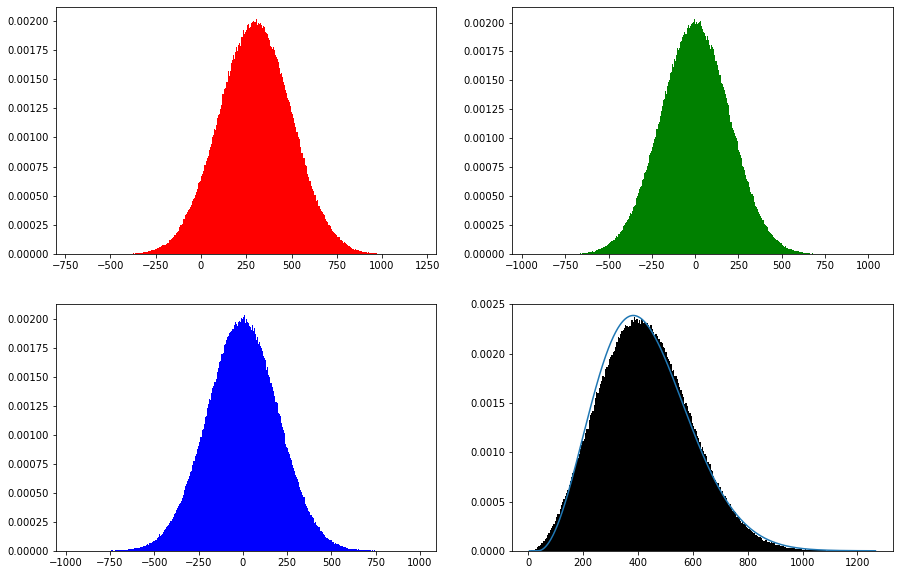

In [33]:
import matplotlib.pyplot as plt
import scipy.stats as ss

fig, axes = plt.subplots(2,2, figsize = (15,10))

axes[0,0].hist(list_vx, bins = 'auto', density=True, range = None, color = 'r')
axes[0,1].hist(list_vy, bins = 'auto', density=True, range = None, color = 'g')
axes[1,0].hist(list_vz, bins = 'auto', density=True, range = None, color = 'b')
axes[1,1].hist(list_norm, bins = 'auto', density=True, range = None, color = 'k')

col=np.array(list_norm)
min_ = np.min(col)
max_ = np.max(col)
X = np.linspace(min_, max_, 1000)
loc, a = get_maxwellian_params(np.mean(col), np.std(col))
Y = ss.maxwell.pdf(X, loc=loc, scale = a)
axes[1,1].plot(X,Y, label = 'maxwellian pdf')

plt.show()

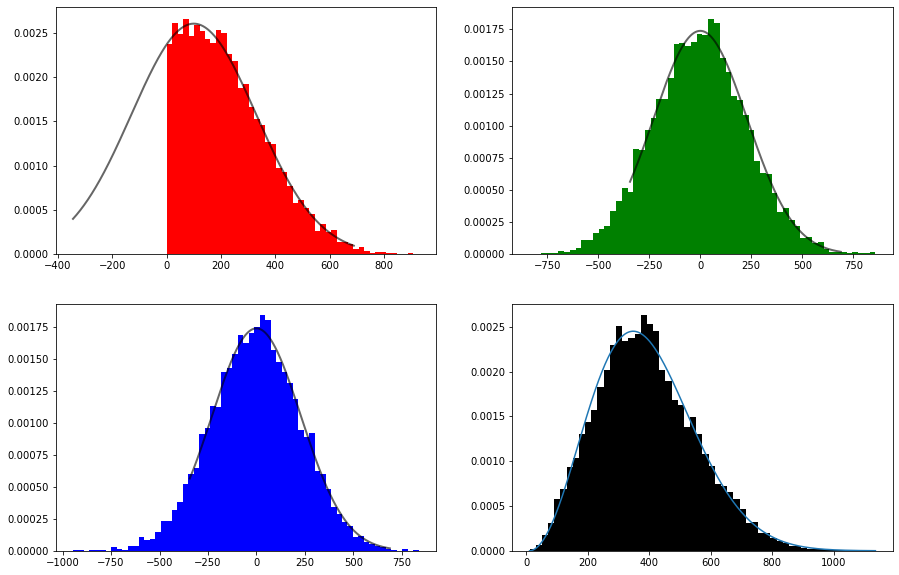

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np
from main import get_maxwellian_mean_speed_from_temperature, get_mass_part, get_gaussian_params_maxwellian, get_maxwellian_params

from scipy.stats import maxwell, norm
from random import gauss, random

n=10000
list_vx = []
list_vy = []
list_vz = []
list_vx_ = []
drift = 100 # m/s
T=300 # K
v_mean = get_maxwellian_mean_speed_from_temperature(T, m = get_mass_part(53, 53, 88))
sigma = get_gaussian_params_maxwellian(T, m = get_mass_part(53, 53, 88))

list_norm = []
for k in range(n):
    vx = norm.rvs(drift, sigma)
    while(vx<0):
        vx = norm.rvs(drift, sigma)
    vx_ = sigma * np.sqrt(-2*np.log10((1-random()))) + drift
    vy = norm.rvs(0, sigma)
    vz = norm.rvs(0, sigma)
    list_vx.append(vx)
    list_vy.append(vy)
    list_vz.append(vz)
    list_norm.append(np.sqrt(vx*vx+vy*vy+vz*vz))
    list_vx_.append(vx_)

fig, axes = plt.subplots(2,2, figsize = (15,10))

axes[0,0].hist(list_vx, bins = 'auto', density=True, range = None, color = 'r')
axes[0,1].hist(list_vy, bins = 'auto', density=True, range = None, color = 'g')
axes[1,0].hist(list_vz, bins = 'auto', density=True, range = None, color = 'b')
axes[1,1].hist(list_norm, bins = 'auto', density=True, range = None, color = 'k')

x = np.linspace(-1.5*sigma, 3*sigma, n)
axes[0,0].plot(x, norm.pdf(x, loc=drift, scale=sigma)/(1-norm.cdf(x=0, loc=drift, scale=sigma)), 'k-', lw=2, alpha=0.6, label='norm pdf')
axes[0,1].plot(x, norm.pdf(x, loc=0, scale=sigma), 'k-', lw=2, alpha=0.6, label='norm pdf')
axes[1,0].plot(x, norm.pdf(x, loc=0, scale=sigma), 'k-', lw=2, alpha=0.6, label='norm pdf')

#rv = norm()
#ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

col=np.array(list_norm)
min_ = np.min(col)
max_ = np.max(col)
X = np.linspace(min_, max_, 1000)
loc, a = get_maxwellian_params(np.mean(col), np.std(col))
Y = ss.maxwell.pdf(X, loc=loc, scale = a)
axes[1,1].plot(X,Y, label = 'maxwellian pdf')

plt.show()

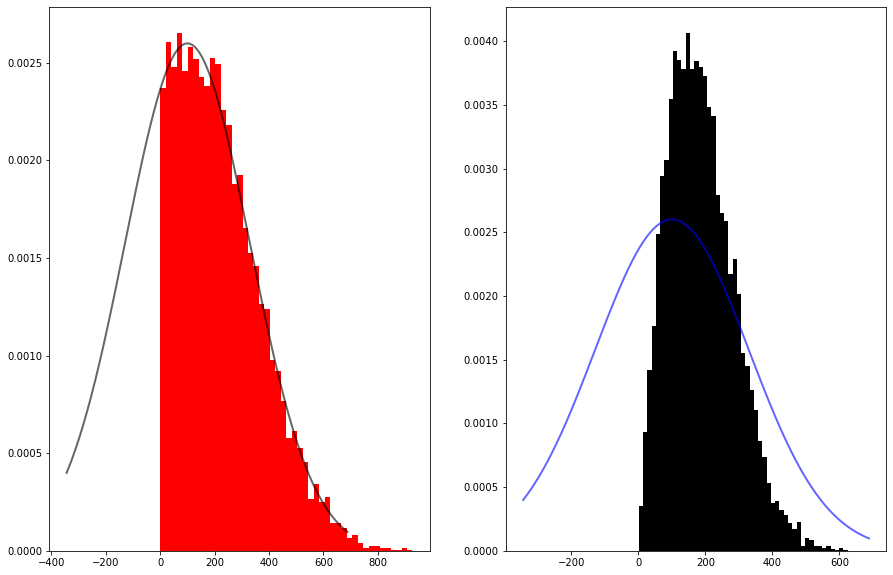

In [2]:
fig, axes = plt.subplots(1,2, figsize = (15,10))

axes[0].hist(list_vx, bins = 'auto', density=True, range = None, color = 'r')
axes[1].hist(list_vx_, bins = 'auto', density=True, range = None, color = 'k')

x = np.linspace(-1.5*sigma, 3*sigma, n)
axes[0].plot(x, norm.pdf(x, loc=drift, scale=sigma)/(1-norm.cdf(x=0, loc=drift, scale=sigma)), 'k-', lw=2, alpha=0.6, label='norm pdf')
axes[1].plot(x, norm.pdf(x, loc=drift, scale=sigma)/(1-norm.cdf(x=0, loc=drift, scale=sigma)), 'b-', lw=2, alpha=0.6, label='norm pdf')


### Injection

Grosse question : pourquoi leap frog algo => je pense que je peux l'adapter à mes besoins, en réfléchissant vraiment bien (bien comprendre le principe).

Concernant l'injection, l'important est d'avoir un schéma qui préserve l'ordre. Ex : j'ai un RK4 (ordre4), je voudrais une injection d'ordre 4. En pratiques, ils utilisent le leap frog algo. xn, vn-1/2...

Je vais considérer ici, comme c'est ce qu'ils m'ont demandé, uniquement l'iode $[I]$, ce qui me permet de ne pas considérer de champ. Et donc de pouvoir injecter comme je le veux, quasiment : Modified fractional time step Boris push.

Si un jour je rajoute les ions etc. => champ non uniforme (il devient important dans la modélisation).

# Modelization results
<table><tr>
<td> <img src="results_tests/uniform/2_temperature_evolution.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="results_tests/uniform_norm/3_temperature_evolution.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

## Sources 
* https://mathworld.wolfram.com/MaxwellDistribution.html
* Francis J. Alexander and Alejandro L. Garcia (1997). The Direct Simulation Monte Carlo Method.
* Bird, G. (1994). Molecular Gas Dynamics and the Direct Simulation of Gas Flows.
* https://scicomp.stackexchange.com/questions/19969/how-do-i-generate-maxwell-boltzmann-variates-using-a-uniform-distribution-random


Conclusion : 
* https://www.mech.kth.se/~lhs/Danielsson_Birgersson.pdf Heat Transfer Between Two Plates (boundaries conditions)
* http://fisica.ufpr.br/sharipov/tube.html # to compare with one tube simulation and the paper : https://avs.scitation.org/doi/10.1116/1.578969 
* https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.566.8427&rep=rep1&type=pdf injection of maxwellian distribution (how to do it)

TODO : 
 * clean le code (cfg etc.)
 * increase by 10/100 the number of particles for the simulation and see if the error remains
 * OPT : initialisation avec deux gaussiennes / boundary conditions (comment les gérer, en fixant la température etc. voir les liens au-dessus).
 * Simulation sur le vrai système : géométrie qui fit le système, commencer par une seule grille (une tube) puis faire deux (système réel). Les liens précédents peuvent être utiles concernant cela (pour comparer mes résultats etc.). On peut seulement sauver les indices pour la deuxième grille (et du coup on va voir dans la première grille uniquement les cases qui nous intéresse).
 
L'objectif de ce que je dois faire : comprendre et connaître la densité de neutre (le flux de neutres) dans le système réel. On simule ainsi uniquement le flux de I !! (pas de deuxième espèce nécessaire) Ensuite on utilise l'algo de Edouard.

Autre : 
* OS - CYS (code pour lancer à partir de python du code en C).
 


On cherche à modélisation par la relation suivant:

$$T(t) = (T_0 - T_{eq})e^{-t/\tau}+T_{eq}$$

Evolution de la température dans l'expérience, à chaque temps $n$: 
1. On définit $w_n = v_n - <v_n>$
2. Puis on calcule : $<w_n^2>$ qui est une approximation de la variance de la variable aléatoire $V_n$ par définition.
3. Et enfin : $T_{n} = \frac{m}{3k}<w_n^2>$.

Etant donné que le système est conservatif, on calcule $T_{eq} = \frac{m}{3k}<v_{0}^2>$ où $<v_{0}^2>$ est une approximation du moment d'ordre 2 de la variable aléatoire $V_0$ (par définition).

Puis on minimise $|T_{exp,n}-\big[(T_0 - T_{eq})e^{-t/\tau}+T_{eq}\big]|$ par rapport à $\tau$.